In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\warm_springs_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [7]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'warm_springs_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("warm_springs")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all
Train Basin File Exists: False


In [8]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("warm_springs_dam.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [13]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [15]:
lstmNoPhysicsDaily.train()

2025-02-06 22:00:35,268: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220035\output.log initialized.
2025-02-06 22:00:35,270: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220035
2025-02-06 22:00:35,272: ### Run configurations for testing_run
2025-02-06 22:00:35,273: experiment_name: testing_run
2025-02-06 22:00:35,275: train_basin_file: warm springs
2025-02-06 22:00:35,277: validation_basin_file: warm springs
2025-02-06 22:00:35,279: test_basin_file: warm springs
2025-02-06 22:00:35,282: train_start_date: 1994-10-01 00:00:00
2025-02-06 22:00:35,284: train_end_date: 2002-09-30 00:00:00
2025-02-06 22:00:35,286: validation_start_date: 2002-10-01 00:00:00
2025-02-06 22:00:35,288: validation_end_date: 2005-09-30 00:00:00
2025-02-06 22:00:35,290: test_start_date: 2005-10-01 00:00:00
2025-02-06 22:00:35,291: test_end_date: 2009-09-30 00:00:00
2025-02-06 22:00:35,292: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
2025-02-06 22:00:52,033: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220035\validation\model_epoch008\validation_metrics.csv
2025-02-06 22:00:52,035: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220035\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220035')

got predictions


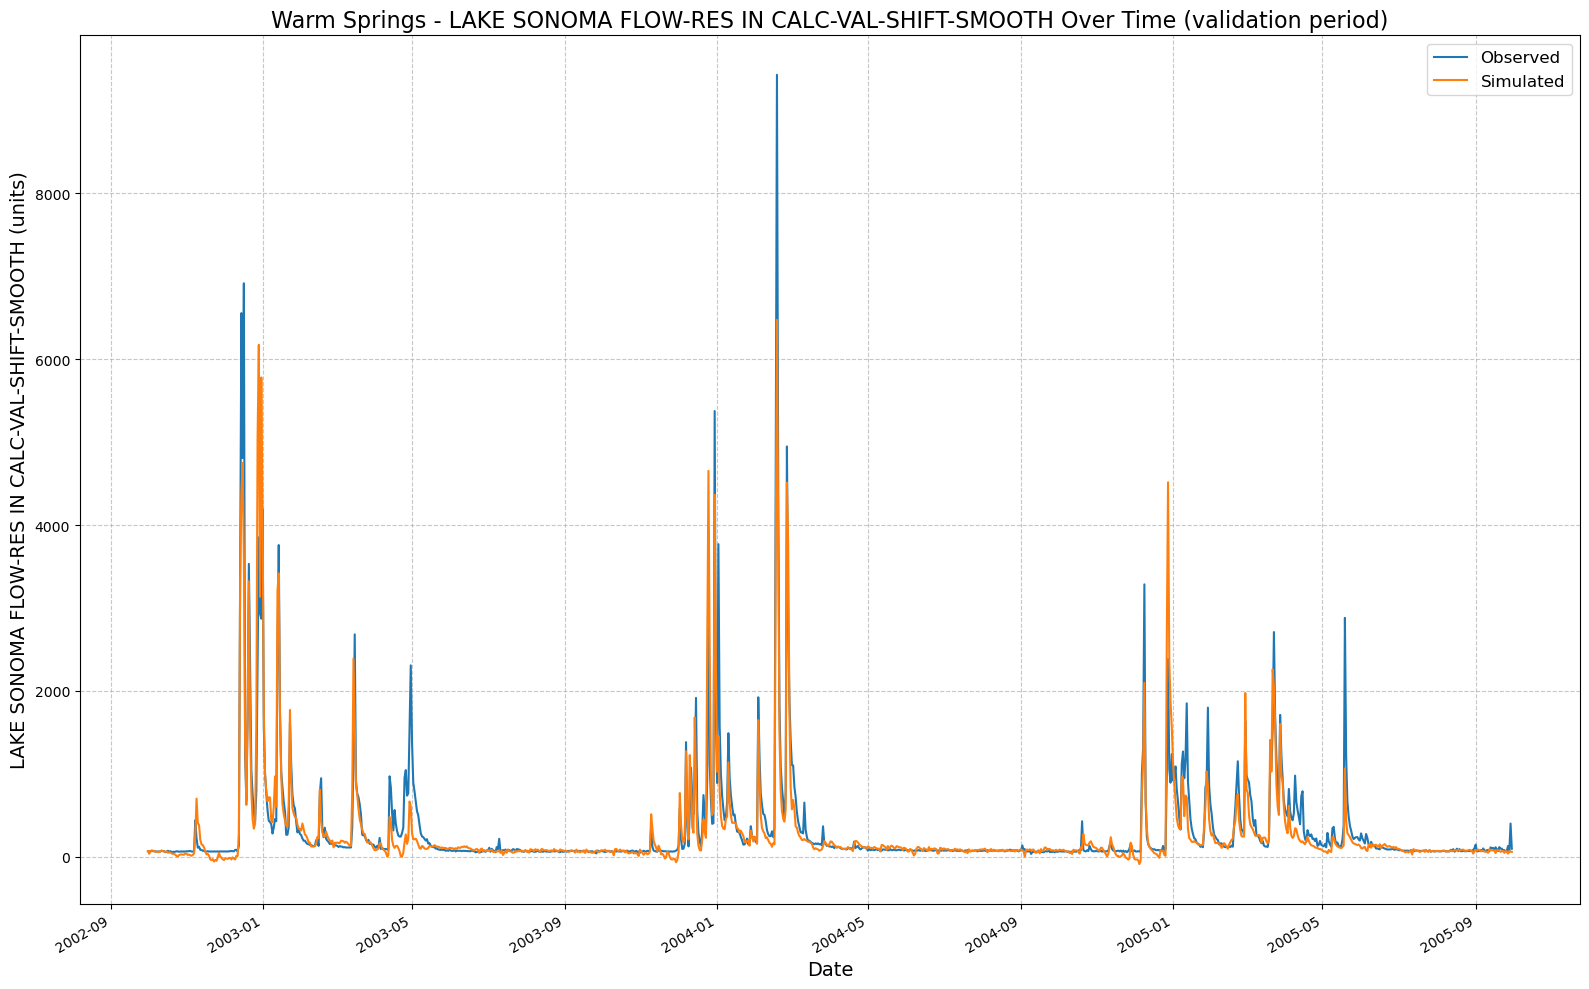

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220035\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.8014106750488281,
 'MSE': 97372.0390625,
 'RMSE': 312.044931159761,
 'KGE': 0.8303973063082728,
 'Alpha-NSE': 0.933865148652054,
 'Beta-KGE': 0.8820573091506958,
 'Beta-NSE': -0.054821957739222105,
 'Pearson-r': 0.8976243348256023,
 'FHV': -2.8750890865921974,
 'FMS': -22.471317983705966,
 'FLV': -2399.0401618294495,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 50.396041870117195}

In [16]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [18]:
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [19]:
lstmPhysicsDaily.train()

2025-02-06 22:00:52,813: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220052\output.log initialized.
2025-02-06 22:00:52,814: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220052
2025-02-06 22:00:52,816: ### Run configurations for testing_run
2025-02-06 22:00:52,818: experiment_name: testing_run
2025-02-06 22:00:52,819: train_basin_file: warm springs
2025-02-06 22:00:52,821: validation_basin_file: warm springs
2025-02-06 22:00:52,822: test_basin_file: warm springs
2025-02-06 22:00:52,823: train_start_date: 1994-10-01 00:00:00
2025-02-06 22:00:52,825: train_end_date: 2002-09-30 00:00:00
2025-02-06 22:00:52,827: validation_start_date: 2002-10-01 00:00:00
2025-02-06 22:00:52,829: validation_end_date: 2005-09-30 00:00:00
2025-02-06 22:00:52,830: test_start_date: 2005-10-01 00:00:00
2025-02-06 22:00:52,831: test_end_date: 2009-09-30 00:00:00
2025-02-06 22:00:52,833: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
2025-02-06 22:01:06,197: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220052\validation\model_epoch008\validation_metrics.csv
2025-02-06 22:01:06,201: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220052\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220052')

got predictions


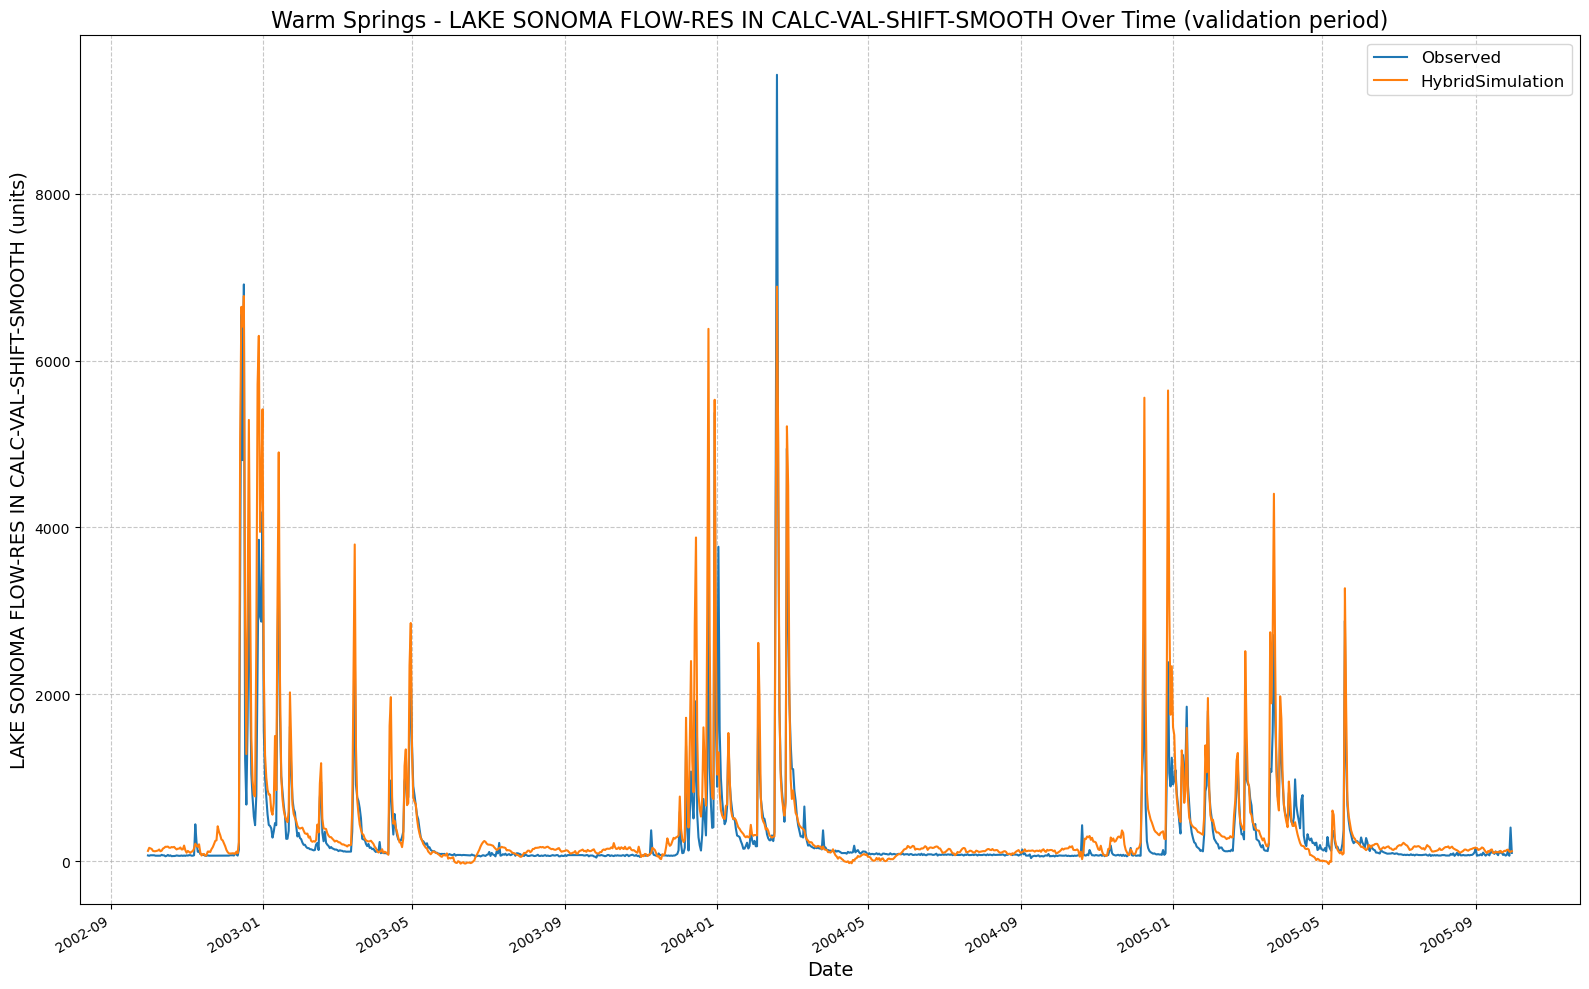

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220052\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.7284214794635773,
 'MSE': 133160.0,
 'RMSE': 364.91094804075146,
 'KGE': 0.579314370353811,
 'Alpha-NSE': 1.2415903241560775,
 'Beta-KGE': 1.3358981609344482,
 'Beta-NSE': 0.1561317474115777,
 'Pearson-r': 0.9239543574829732,
 'FHV': 25.85940957069397,
 'FMS': -21.751128784136395,
 'FLV': -2545.2302866659197,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 27.05415725708008}

In [20]:
lstmPhysicsDaily.results()

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be rem

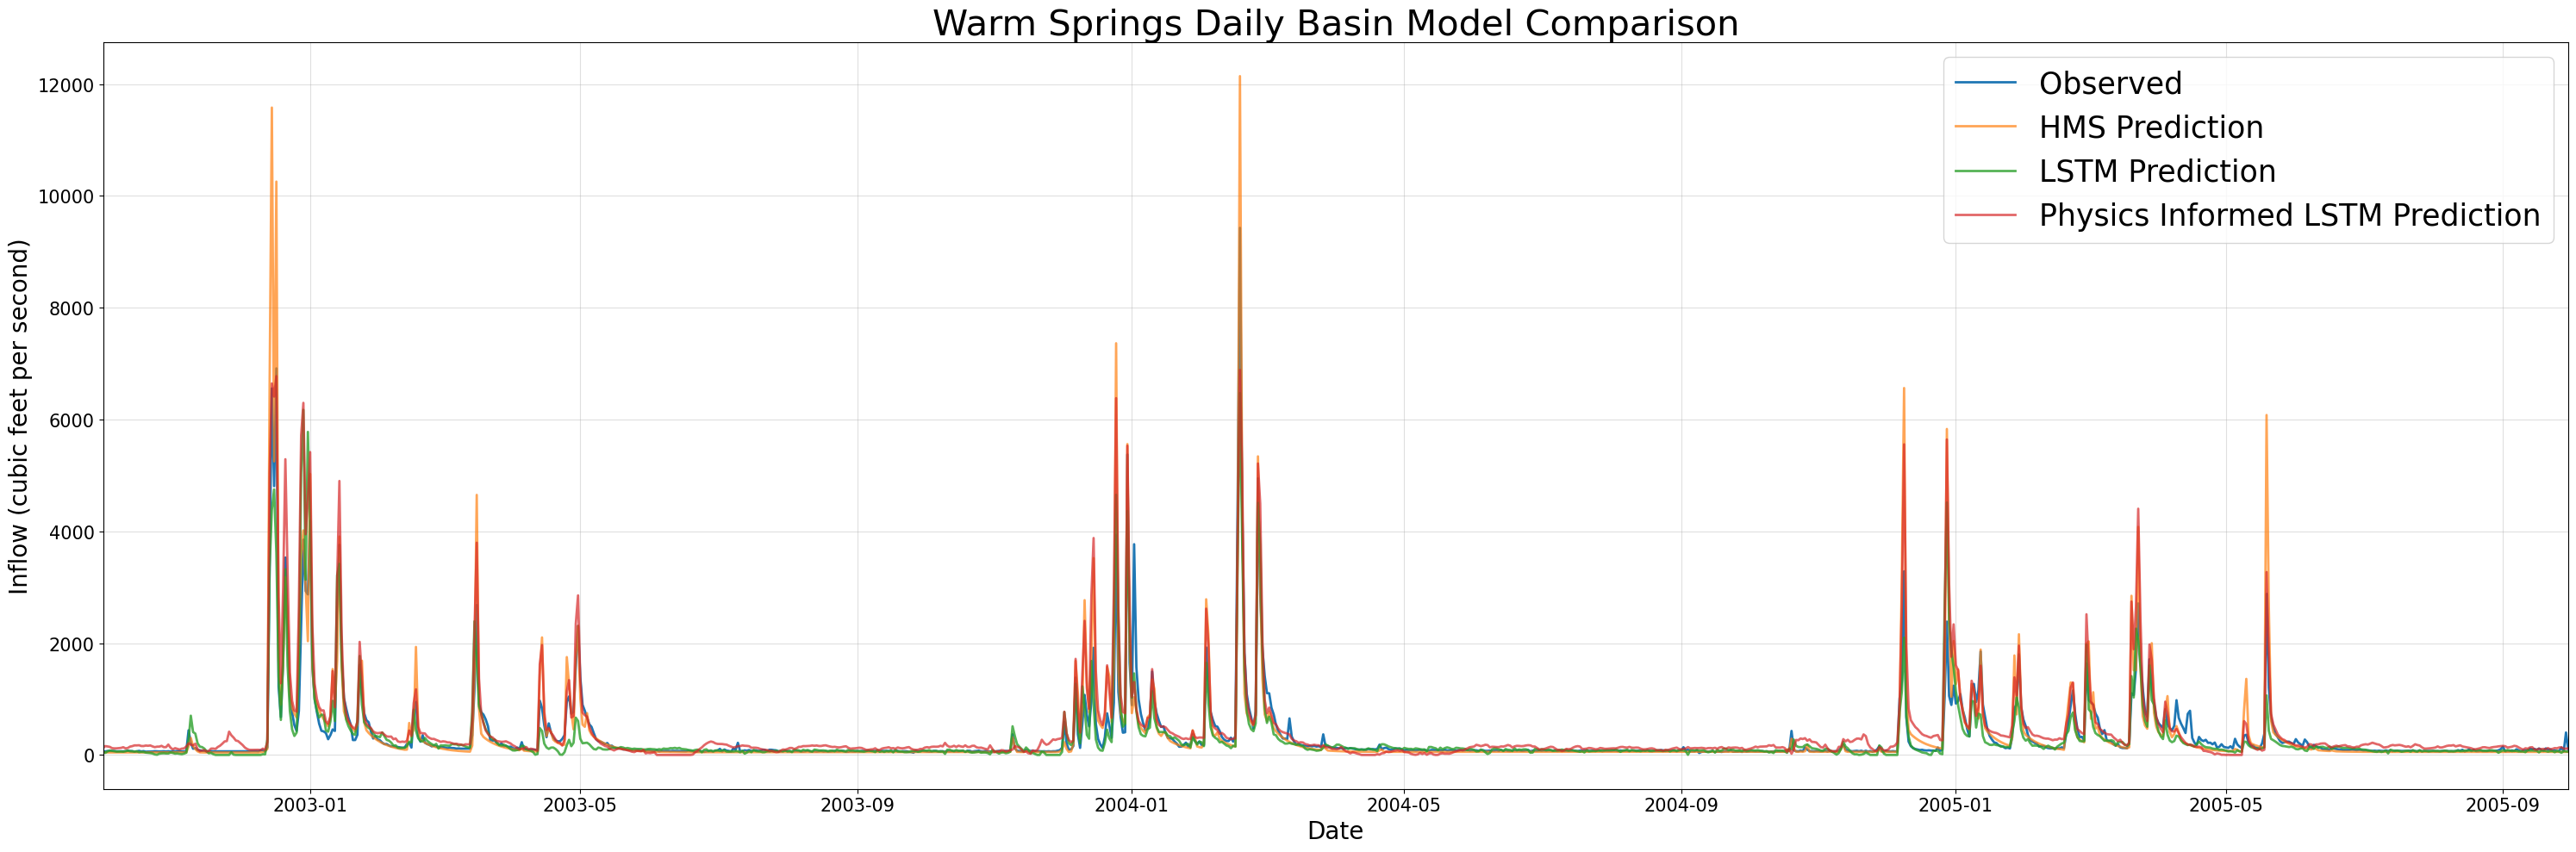

In [26]:
lstm_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220035/results_output_validation.csv'
lstmPhysics_results_path = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220052/results_output_validation.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Warm Springs Daily Basin Model Comparison', fName = "warm_springs_daily_eval_metrics.csv")

In [28]:
metrics_df

HMS          LSTM  Physics_Informed_LSTM
NSE               0.695977      0.801767               0.728600
MSE          149067.929476  97197.427376          133072.244531
RMSE            386.093162    311.765019             364.790686
KGE               0.629017      0.832311               0.578491
Alpha-NSE         1.354590      0.933193               1.241290
Beta-KGE          1.087426      0.885142               1.337160
Beta-NSE          0.040637     -0.053388               0.156718
Pearson-r         0.934800      0.897706               0.924023
FHV              34.412169     -2.875089              25.859411
FMS              11.222054    -22.471333             -21.751136
FLV              75.923474  -2399.039768           -2545.229939
Peak-Timing       0.000000      0.400000               0.000000
Peak-MAPE        57.593945     50.396041              27.054159

## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [31]:
#lstm_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_164712/results_output_validation.csv'
#lstmPhysics_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_173955/results_output_validation.csv'
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be rem

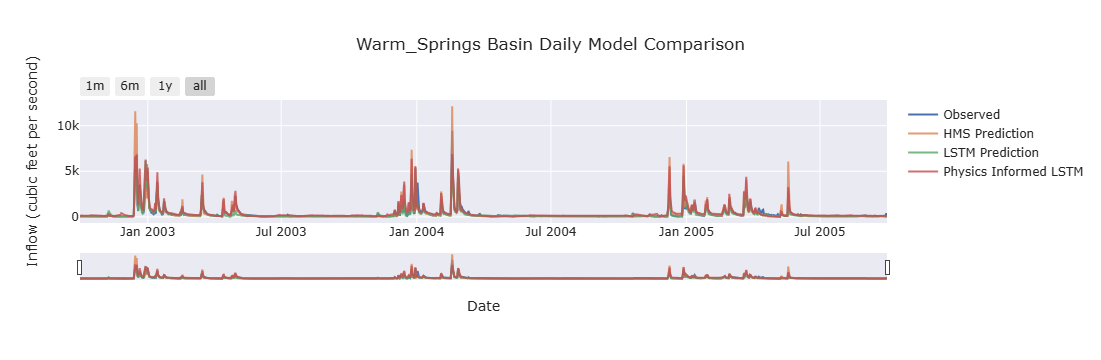

HMS          LSTM  Physics_Informed_LSTM
NSE               0.695977      0.801767               0.728600
MSE          149067.929476  97197.427376          133072.244531
RMSE            386.093162    311.765019             364.790686
KGE               0.629017      0.832311               0.578491
Alpha-NSE         1.354590      0.933193               1.241290
Beta-KGE          1.087426      0.885142               1.337160
Beta-NSE          0.040637     -0.053388               0.156718
Pearson-r         0.934800      0.897706               0.924023
FHV              34.412169     -2.875089              25.859411
FMS              11.222054    -22.471333             -21.751136
FLV              75.923474  -2399.039768           -2545.229939
Peak-Timing       0.000000      0.400000               0.000000
Peak-MAPE        57.593945     50.396041              27.054159

In [33]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Warm_Springs Basin Daily Model Comparison', fName = "warm_springs_daily_eval_metrics.csv")

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [36]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [38]:
lstmNoPhysicsDailyExt.train()

2025-02-06 22:02:07,930: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\output.log initialized.
2025-02-06 22:02:07,932: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207
2025-02-06 22:02:07,935: ### Run configurations for testing_run
2025-02-06 22:02:07,936: experiment_name: testing_run
2025-02-06 22:02:07,939: train_basin_file: warm springs
2025-02-06 22:02:07,941: validation_basin_file: warm springs
2025-02-06 22:02:07,943: test_basin_file: warm springs
2025-02-06 22:02:07,946: train_start_date: 1994-10-01 00:00:00
2025-02-06 22:02:07,948: train_end_date: 2005-09-30 00:00:00
2025-02-06 22:02:07,949: validation_start_date: 2002-10-01 00:00:00
2025-02-06 22:02:07,951: validation_end_date: 2005-09-30 00:00:00
2025-02-06 22:02:07,953: test_start_date: 2005-10-01 00:00:00
2025-02-06 22:02:07,954: test_end_date: 2009-09-30 00:00:00
2025-02-06 22:02:07,956: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]
2025-02-06 22:02:36,484: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\validation\model_epoch016\validation_metrics.csv
2025-02-06 22:02:36,488: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220207')

2025-02-06 22:02:36,574: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]
2025-02-06 22:02:37,189: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\test\model_epoch016\test_metrics.csv
2025-02-06 22:02:37,192: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\test\model_epoch016\test_results.p
got predictions


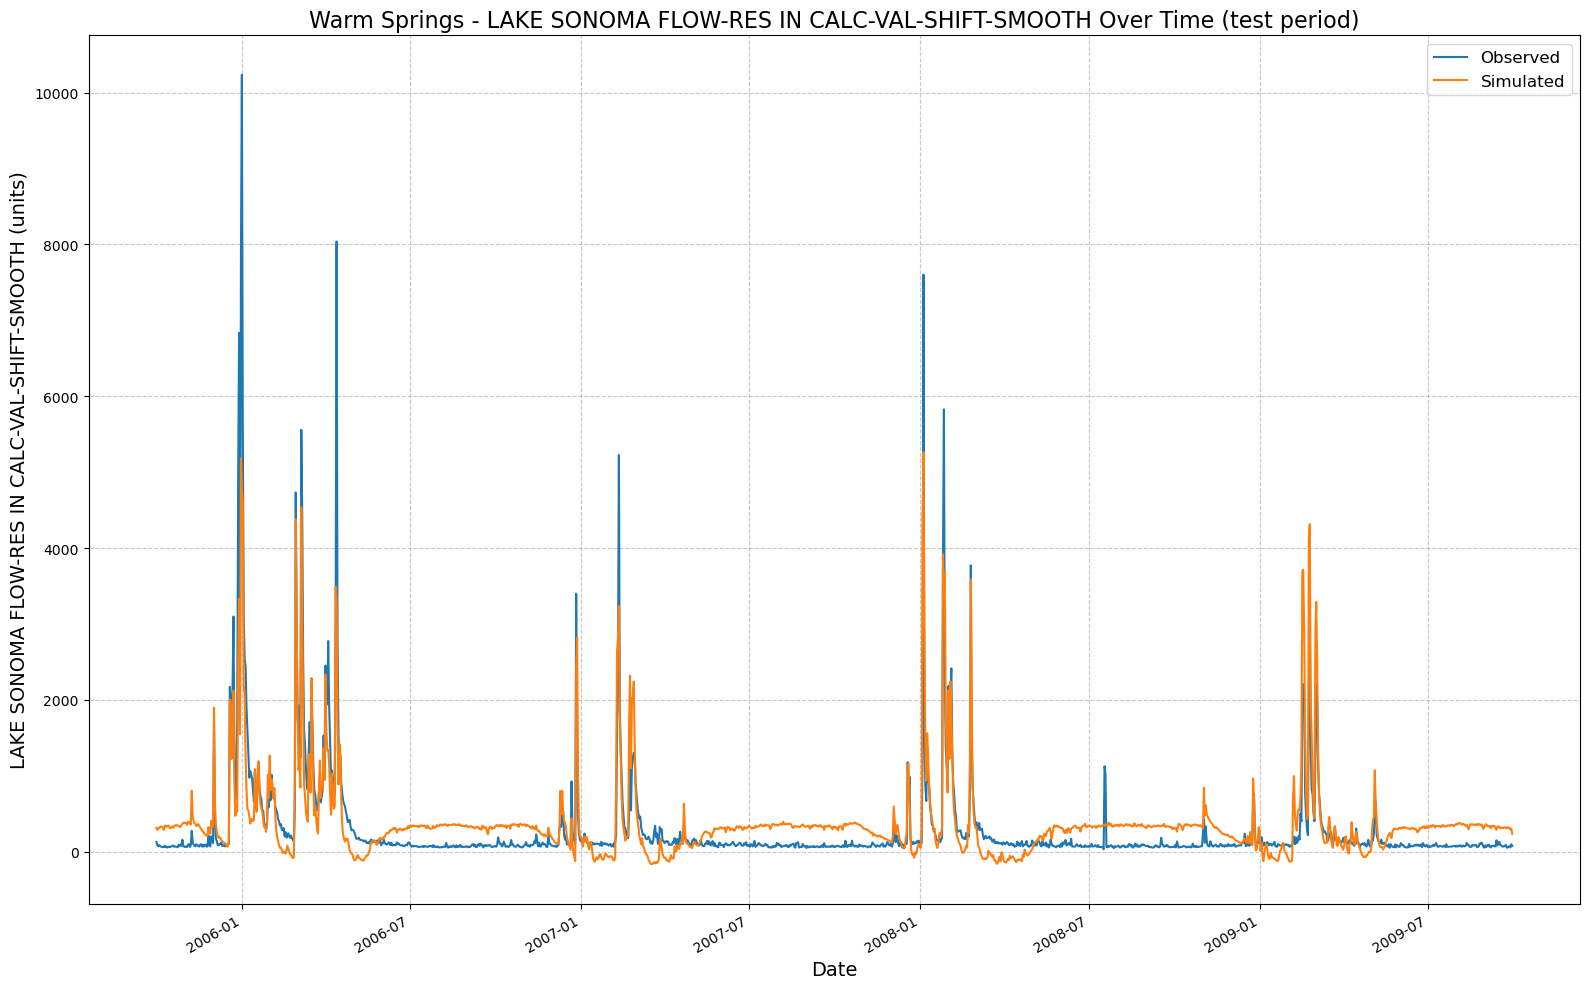

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220207\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7123801112174988,
 'MSE': 153920.59375,
 'RMSE': 392.3271514310474,
 'KGE': 0.6320871145124547,
 'Alpha-NSE': 0.7996430376574246,
 'Beta-KGE': 1.271235466003418,
 'Beta-NSE': 0.11030974058989897,
 'Pearson-r': 0.8528663840907313,
 'FHV': -16.402988135814667,
 'FMS': -43.039554908606306,
 'FLV': -1286.0786439146548,
 'Peak-Timing': 0.5,
 'Peak-MAPE': 48.34275245666504}

In [39]:
lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [41]:
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [42]:
lstmPhysicsDailyExt.train()

2025-02-06 22:02:38,042: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\output.log initialized.
2025-02-06 22:02:38,043: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238
2025-02-06 22:02:38,044: ### Run configurations for testing_run
2025-02-06 22:02:38,045: experiment_name: testing_run
2025-02-06 22:02:38,046: train_basin_file: warm springs
2025-02-06 22:02:38,046: validation_basin_file: warm springs
2025-02-06 22:02:38,048: test_basin_file: warm springs
2025-02-06 22:02:38,049: train_start_date: 1994-10-01 00:00:00
2025-02-06 22:02:38,050: train_end_date: 2005-09-30 00:00:00
2025-02-06 22:02:38,051: validation_start_date: 2002-10-01 00:00:00
2025-02-06 22:02:38,053: validation_end_date: 2005-09-30 00:00:00
2025-02-06 22:02:38,054: test_start_date: 2005-10-01 00:00:00
2025-02-06 22:02:38,055: test_end_date: 2009-09-30 00:00:00
2025-02-06 22:02:38,056: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
2025-02-06 22:03:10,664: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\validation\model_epoch016\validation_metrics.csv
2025-02-06 22:03:10,666: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220238')

2025-02-06 22:03:10,769: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
2025-02-06 22:03:11,580: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\test\model_epoch016\test_metrics.csv
2025-02-06 22:03:11,582: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\test\model_epoch016\test_results.p
got predictions


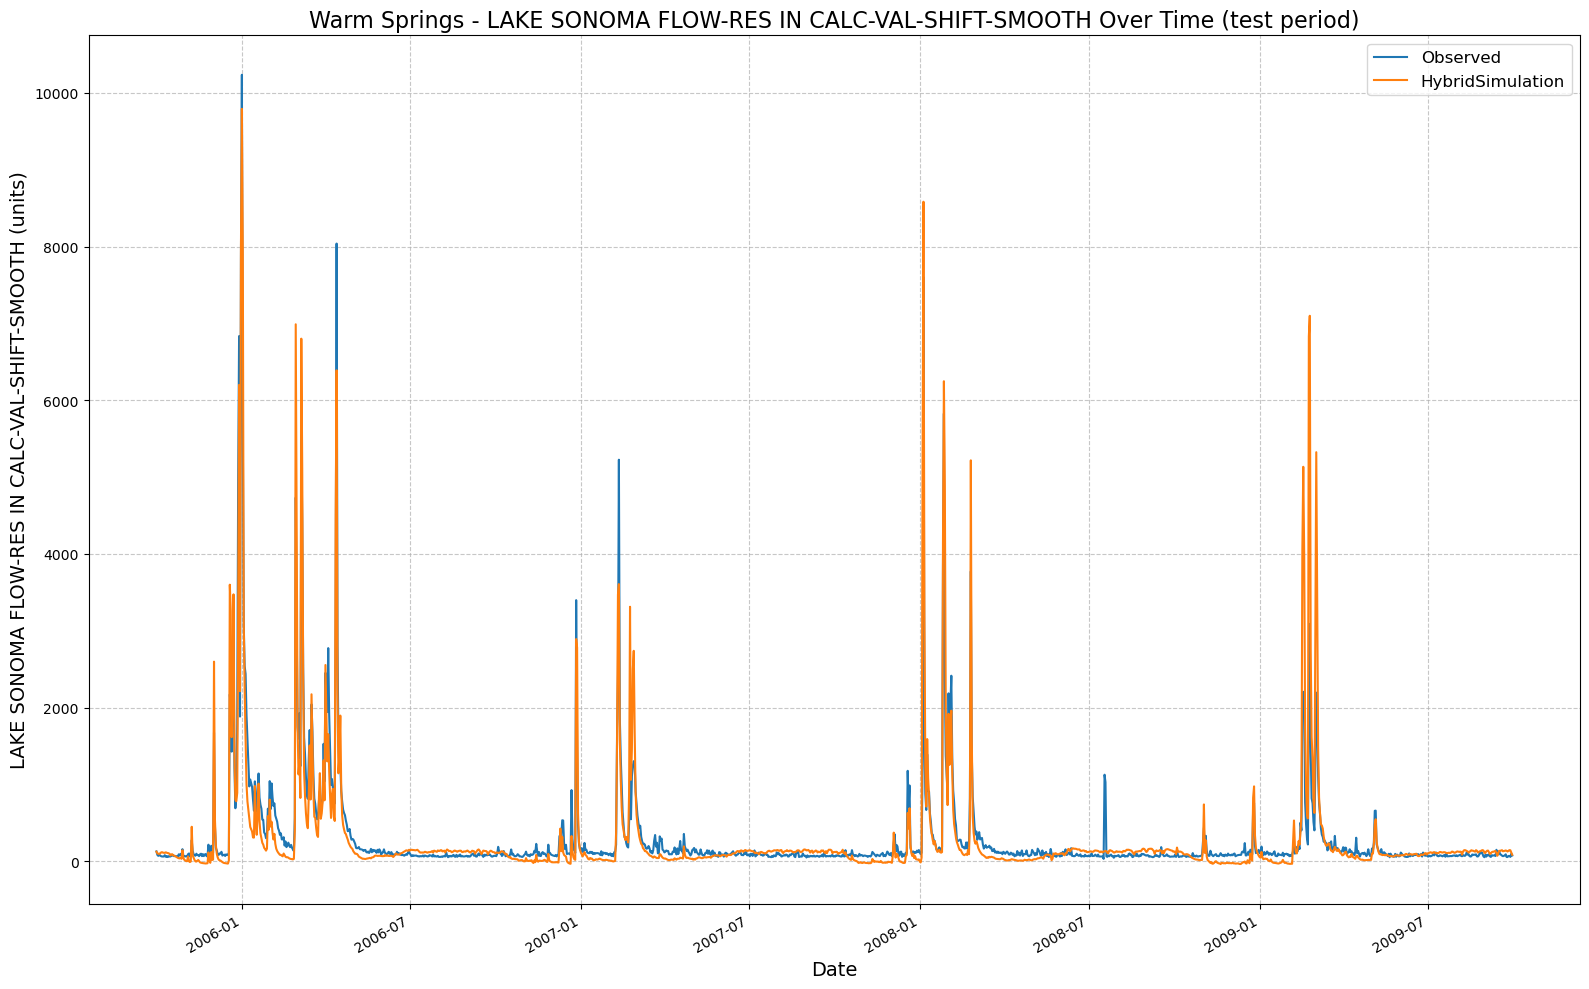

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_0602_220238\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7846059203147888,
 'MSE': 115268.7421875,
 'RMSE': 339.512506673171,
 'KGE': 0.8097636696628339,
 'Alpha-NSE': 1.1713774671526063,
 'Beta-KGE': 0.9771852493286133,
 'Beta-NSE': -0.009278609675728614,
 'Pearson-r': 0.9206330529482756,
 'FHV': 24.190662801265717,
 'FMS': 7.938552473277167,
 'FLV': -1309.0022764214286,
 'Peak-Timing': 0.16666666666666666,
 'Peak-MAPE': 47.862160205841064}

In [43]:
lstmPhysicsDailyExt.results('test')

## compare results

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\

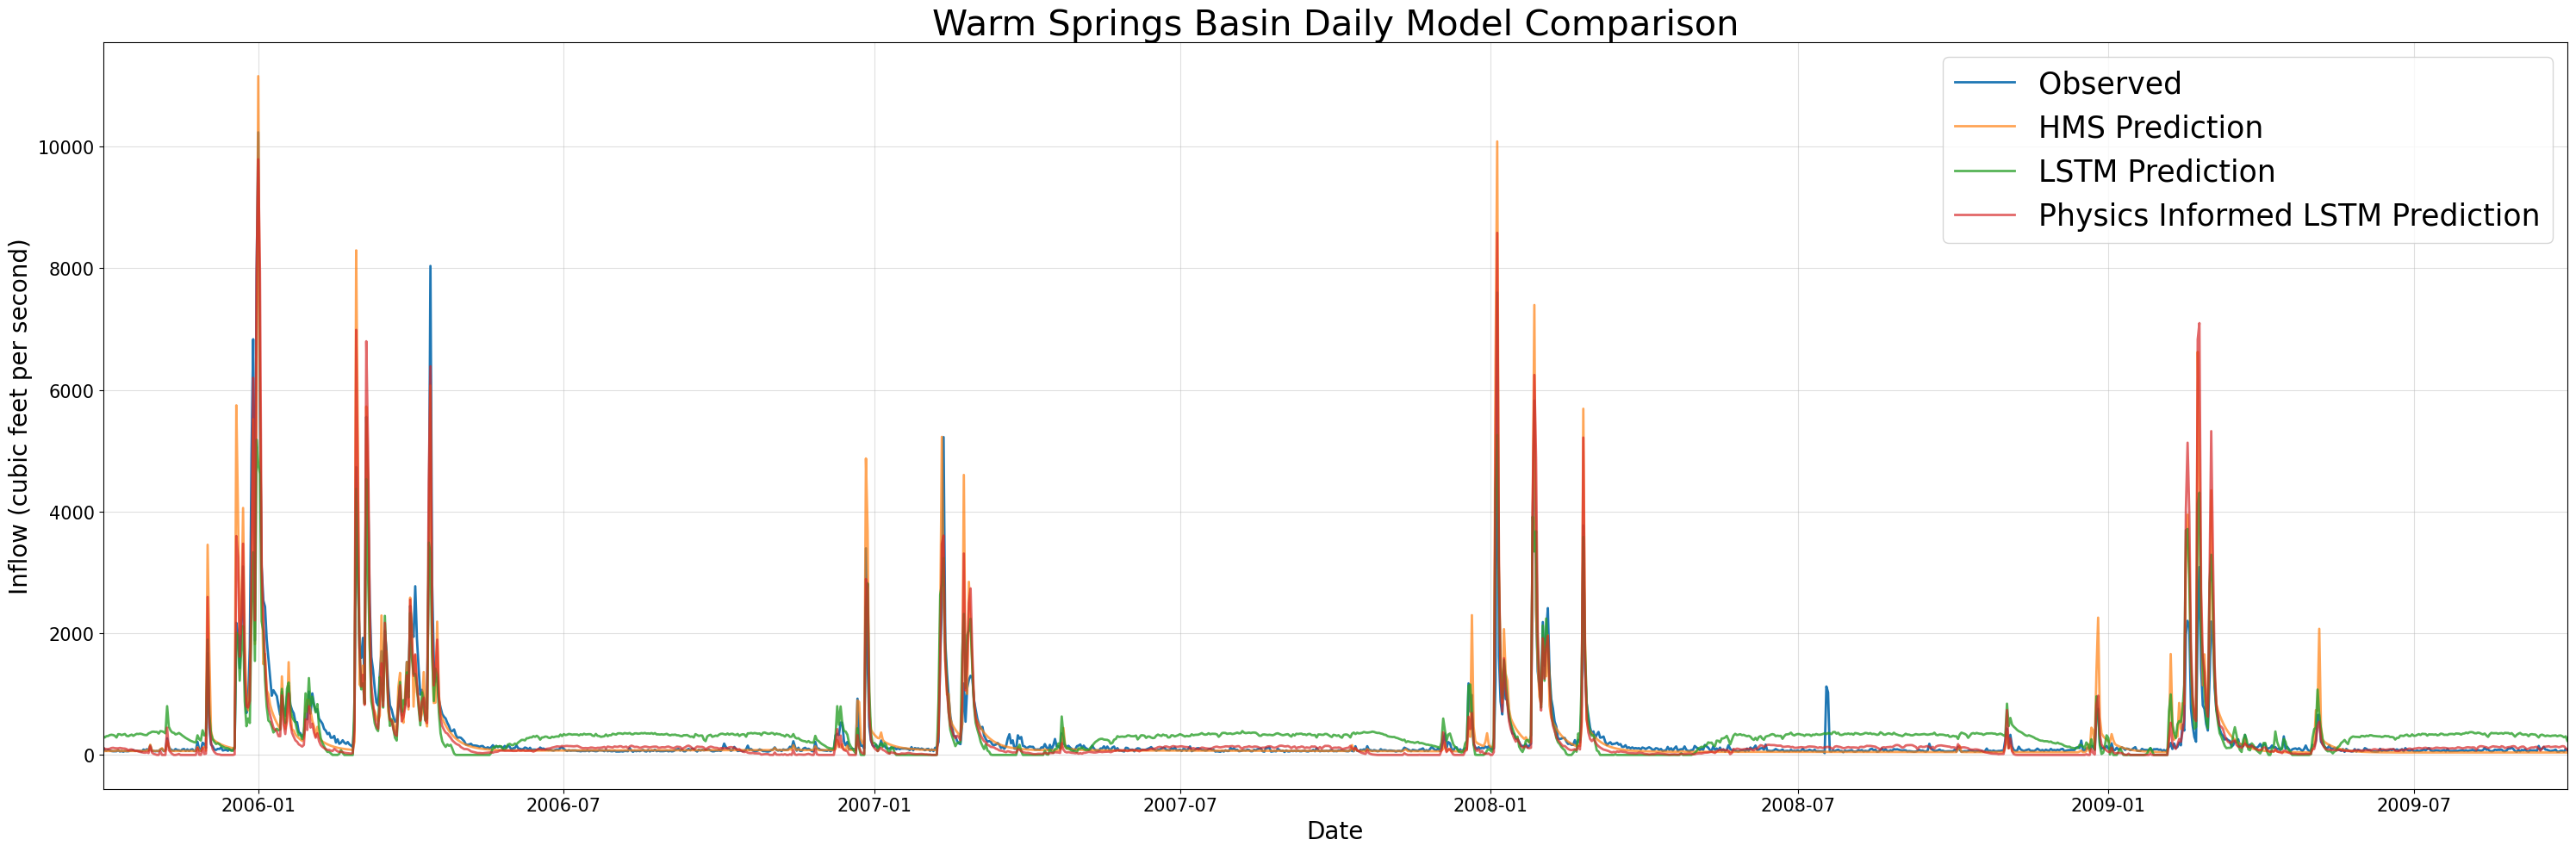

In [49]:
lstm_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220207/results_output_test.csv'
lstmPhysics_results_path_ext = 'F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_0602_220238/results_output_test.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Warm Springs Basin Daily Model Comparison', fName = "warm_springs_daily_metrics.csv")

In [50]:
metrics_df

HMS           LSTM  Physics_Informed_LSTM
NSE               0.732378       0.718778               0.785322
MSE          143218.425603  150496.513825          114885.350955
RMSE            378.442103     387.938802             338.947416
KGE               0.791192       0.604755               0.811393
Alpha-NSE         1.179500       0.789772               1.170387
Beta-KGE          1.037987       1.303829               0.984063
Beta-NSE          0.015449       0.123565              -0.006482
Pearson-r         0.900312       0.859607               0.920708
FHV              24.454837     -16.402987              24.190664
FMS              25.356069     -43.039547               7.938543
FLV              79.358078   -1286.078529           -1309.002087
Peak-Timing       0.833333       0.500000               0.166667
Peak-MAPE        44.995233      48.342751              47.862160

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\

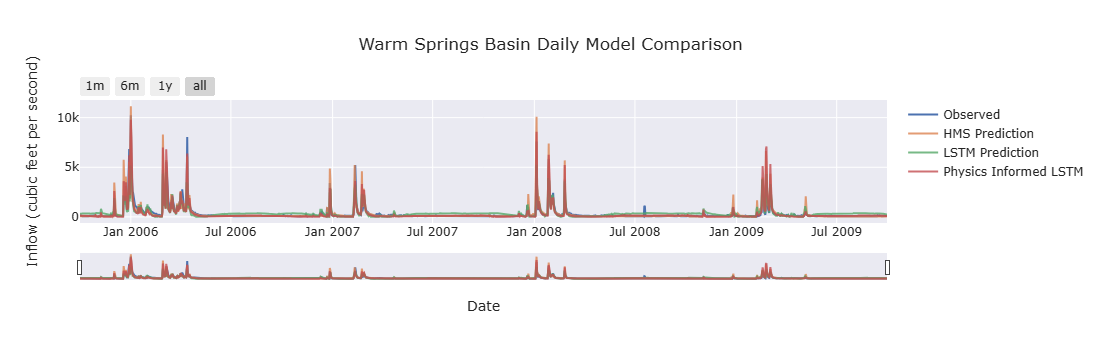

HMS           LSTM  Physics_Informed_LSTM
NSE               0.732378       0.718778               0.785322
MSE          143218.425603  150496.513825          114885.350955
RMSE            378.442103     387.938802             338.947416
KGE               0.791192       0.604755               0.811393
Alpha-NSE         1.179500       0.789772               1.170387
Beta-KGE          1.037987       1.303829               0.984063
Beta-NSE          0.015449       0.123565              -0.006482
Pearson-r         0.900312       0.859607               0.920708
FHV              24.454837     -16.402987              24.190664
FMS              25.356069     -43.039547               7.938543
FLV              79.358078   -1286.078529           -1309.002087
Peak-Timing       0.833333       0.500000               0.166667
Peak-MAPE        44.995233      48.342751              47.862160

In [53]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Warm Springs Basin Daily Model Comparison', fName = "warm_springs_daily_metrics.csv")